In [1]:

import pylabnet.hardware.awg.zi_hdawg as zi_hdawg
from pylabnet.utils.logging.logger import LogClient


import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import time

from IPython.display import clear_output, display

import pyvisa
from pylabnet.utils.logging.logger import LogClient
from pylabnet.network.client_server import agilent_e4405B
import pylabnet.hardware.spectrum_analyzer.agilent_e4405B as sa_hardware

#!pip install seaborn
import itertools as it
import pandas as pd
import seaborn as sns

from pylabnet.utils.logging.logger import LogService
from pylabnet.network.core.generic_server import GenericServer
import os
import sys
from pylabnet.utils.iq_upconversion.optimizer import IQOptimizer, IQOptimizer_GD, IQOptimizer_GD_multifreq
#from pylabnet.utils.iq_upconversion.optimizer_temp import IQOptimizer as IQ_w_ports
#from pylabnet.utils.iq_upconversion.optimizer_temp import IQOptimizer_GD
from pylabnet.network.client_server import HMC_T2220

from pylabnet.network.client_server.agilent_83732b import Client

# Instantiante HDAWG

In [2]:
dev_id = 'dev8354'
# Instantiate Hardware class
hd = zi_hdawg.Driver(dev_id, None)

# Select channel grouping
#hd.set_channel_grouping(0)

#hd.enable_output(2)
#hd.enable_output(3)

# Connect to MW client

In [3]:
# Connect to MW source client
#mw_client = HMC_T2220.Client(
#    host='140.247.189.82',
#    port=2552
#)

# Connect to MW source client
mw = Client(
    host='140.247.189.50', 
    port=32302
)

In [4]:
# Check that MW source is set to correct power
# mw_client.output_on()
pow = 15  # -20 dBm
mw.set_power(pow)
mw.output_on()
#mw_client.get_power()

# Connect to Spectrum Analyzer

In [5]:
sa = agilent_e4405B.Client(
    host='140.247.189.24',
    port=23892
)

# Reset spectrum analzyer
sa.write('*RST')

(6, <StatusCode.success: 0>)

# Optimize

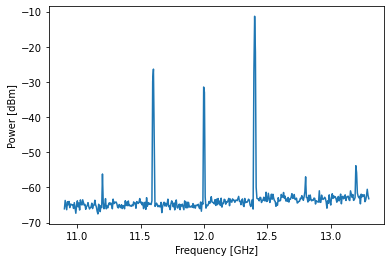

In [6]:
opt1 = IQOptimizer_GD(mw, hd, sa, 12e9, 400e6, param_guess = ([85, 1, 0.6, 0.01, 0.01]), awg_delay_time=0.01, averages=10, HDAWG_ports=[1,2], oscillator=1, min_power=-65, vi_step=0.005, vq_step=0.005, max_iterations = 30)

50.610896587371826


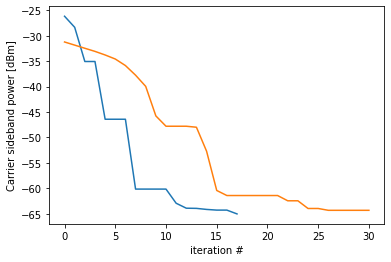

In [12]:
import time
start = time.time()
opt1.opt()
print(time.time()-start)

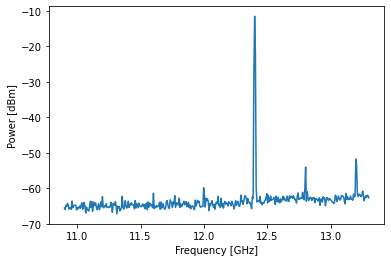

In [10]:
sa.plot_trace()

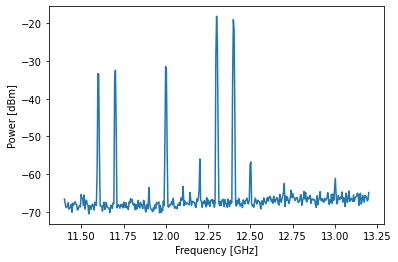

In [6]:
opt1 = IQOptimizer_GD_multifreq(mw, hd, sa, 12e9, [300e6, 400e6], param_guess = ([90, 90, 1, 1, 0.01, 0.01]), awg_delay_time=0.01, averages=10, HDAWG_ports=[1,2], oscillator=[1,2], min_power=-65, vi_step=0.005, vq_step=0.005, max_iterations = 30)

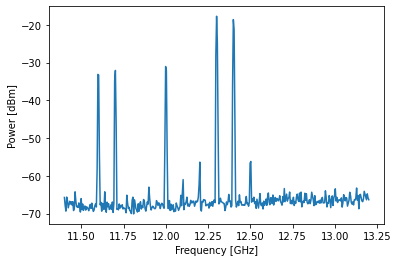

TypeError: 'NoneType' object does not support item assignment

In [7]:
import time
start = time.time()
opt1.opt()
print(time.time()-start)


In [12]:
np.arccos(0.5)*180/np.pi

60.00000000000001